Using tips dataset,  we will be trying to recommend a business what changes it can make to improve the business.

This is done by applying the word cloud to the tips which the business customers have left for the buusiness.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! wget https://ist664yash.s3.amazonaws.com/tip.csv #fetching data from AWS s3

--2022-05-08 18:58:55--  https://ist664yash.s3.amazonaws.com/tip.csv
Resolving ist664yash.s3.amazonaws.com (ist664yash.s3.amazonaws.com)... 52.216.84.115
Connecting to ist664yash.s3.amazonaws.com (ist664yash.s3.amazonaws.com)|52.216.84.115|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2022-05-08 18:58:55 ERROR 403: Forbidden.



In [ ]:
import pandas as pd # To read data from CSVs directly into dataframes
import numpy as np # For doing a data type cast
from tensorflow import keras # As usual, we will use keras as a front end to TF
from tqdm import tqdm # This is an iterator that makes nice prorgess bars
import nltk # For doing some preprocessing on our string data
nltk.download('stopwords')
from nltk.corpus import stopwords # We will do some cleanup of the text
from nltk.tokenize import sent_tokenize, word_tokenize # Cleanup will start with tokenization
import re # We may use some regex in the cleanup
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
a = pd.read_csv('/content/drive/MyDrive/tip.csv')

In [ ]:
a.head()

,Unnamed: 0,user_id,business_id,text,date,compliment_count
0,0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [ ]:
b = a['text'][0]
print(b)

Avengers time with the ladies.


In [ ]:
from nltk import FreqDist

In [ ]:
top_5_businesses = FreqDist(a['business_id']).most_common(5)
print(top_5_businesses[0][0])

FEXhWNCMkv22qG04E83Qjg


In [ ]:
text = []
for i in top_5_businesses:
  t = a[a['business_id'].str.match(i[0])]
  text.append(t['text'].to_string()) 
  


In [ ]:
len(top_5_businesses)

5

In [60]:
text[4]


'4159      Taxi is still cheaper than Uber to/from the ai...\n4357      Ugh... Saints country... Gotta be on high aler...\n4392      Here again. Oh joy! Love the jazz music in the...\n5578      From parking lot head to 4th floor for bridge ...\n6385      Bags were off and spinning on the carrousel by...\n8999                                    Picking up my Baby.\n9759                                            Free WiFi !\n9999      Late flight to Dallas for conference in Dr Wor...\n10287     Free luggage tag for checking in and TSA secur...\n11251                            Picking up the other half!\n12182                                                 Home.\n12467     First trip in some time - huge redecoration  m...\n12474                             Goodbye New Orleans. :*-(\n13338                                               Game on\n13851     Love the size of MSY. Just big enough to offer...\n16204     Buy a jack and coke - you can walk around with...\n18206                  

In [ ]:
tokenized_text = []
for i in text:
  tokenized_text.append(nltk.word_tokenize(i))

In [ ]:
tokenized_text_alpha = []

for i in tokenized_text:
  text_tokens_alpha = [w for w in i if w.isalpha()]
  text_lower = [w.lower() for w in text_tokens_alpha]
  tokenized_text_alpha.append(text_lower)

In [ ]:
nltk_stops = nltk.corpus.stopwords.words('english')

In [ ]:
tokenized_text_no_stop = []
for i in tokenized_text_alpha:
  no_stop = [w for w in i if w not in nltk_stops]
  tokenized_text_no_stop.append(no_stop)


In [ ]:
tokenized_text_no_stop[4]

['taxi',
 'still',
 'cheaper',
 'uber',
 'ai',
 'ugh',
 'saints',
 'country',
 'got',
 'ta',
 'high',
 'aler',
 'oh',
 'joy',
 'love',
 'jazz',
 'music',
 'parking',
 'lot',
 'head',
 'floor',
 'bridge',
 'bags',
 'spinning',
 'carrousel',
 'picking',
 'baby',
 'free',
 'wifi',
 'late',
 'flight',
 'dallas',
 'conference',
 'dr',
 'wor',
 'free',
 'luggage',
 'tag',
 'checking',
 'tsa',
 'secur',
 'picking',
 'half',
 'home',
 'first',
 'trip',
 'time',
 'huge',
 'redecoration',
 'goodbye',
 'new',
 'orleans',
 'game',
 'love',
 'size',
 'msy',
 'big',
 'enough',
 'offer',
 'buy',
 'jack',
 'coke',
 'walk',
 'around',
 'prepared',
 'long',
 'security',
 'line',
 'wow',
 'priority',
 'boarding',
 'show',
 'still',
 'making',
 'people',
 'check',
 'laptops',
 'baggage',
 'drop',
 'system',
 'delta',
 'check',
 'wow',
 'cafe',
 'wingery',
 'concourse',
 'laissez',
 'les',
 'bon',
 'temps',
 'rouler',
 'glad',
 'building',
 'new',
 'terminal',
 'repla',
 'wohooo',
 'let',
 'party',
 'start

In [ ]:
import nltk # We'll be using lots of facilities from this
nltk.download('punkt') # Download, as not included in basic colab

# text from online gutenberg
from urllib import request # We will need this to read from the URL

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()
snowball = nltk.stem.SnowballStemmer('english')
type(porter), type(lancaster), type(snowball)

(nltk.stem.porter.PorterStemmer,
 nltk.stem.lancaster.LancasterStemmer,
 nltk.stem.snowball.SnowballStemmer)

In [ ]:
tokenized_text_no_stop_porter = []
for i in tokenized_text_no_stop:
  t = [porter.stem(w) for w in i]
  tokenized_text_no_stop_porter.append(t)

In [ ]:
tokenized_text_no_stop_porter[0][:10]

['get',
 'earli',
 'open',
 'hour',
 'day',
 'alway',
 'love',
 'place',
 'bad',
 'cash']

In [ ]:
tokenized_text_no_stop_lancaster = []
for i in tokenized_text_no_stop:
  t = [lancaster.stem(w) for w in i]
  tokenized_text_no_stop_lancaster.append(t)

In [ ]:
tokenized_text_no_stop_lancaster[0][:10]

['get', 'ear', 'op', 'hour', 'day', 'alway', 'lov', 'plac', 'bad', 'cash']

In [ ]:
tokenized_text_no_stop_snowball = []
for i in tokenized_text_no_stop:
  t = [snowball.stem(w) for w in i]
  tokenized_text_no_stop_snowball.append(t)

In [ ]:
tokenized_text_no_stop_snowball[0][:10]

['get',
 'earli',
 'open',
 'hour',
 'day',
 'alway',
 'love',
 'place',
 'bad',
 'cash']

In [ ]:
nltk.download('wordnet')
wnl = nltk.WordNetLemmatizer()
type(wnl)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


nltk.stem.wordnet.WordNetLemmatizer

In [ ]:
tokenized_text_no_stop_lemma = []
for i in tokenized_text_no_stop:
  t = [wnl.lemmatize(w) for w in i]
  tokenized_text_no_stop_lemma.append(t)

In [ ]:
tokenized_text_no_stop_lemma[0][:10]

['get',
 'early',
 'open',
 'hour',
 'day',
 'always',
 'love',
 'place',
 'bad',
 'cash']

In [ ]:
top_5_words = FreqDist(tokenized_text_no_stop[0]).most_common(5)

In [ ]:
from wordcloud import WordCloud

In [ ]:
comment_words = []
cw = ""
for j in range(0,5):
  for i in tokenized_text_no_stop[j]:
    cw += " "+ i +" "
  comment_words.append(cw)
  cw = ""

  

In [ ]:
WordCloud(width = 800, height = 800, background_color ='white', max_words = 100, min_font_size = 10).generate("hello")

In [ ]:
wordcloud = []
for i in range(0,5):
  wc = WordCloud(width = 800, height = 800, background_color ='white', max_words = 100, min_font_size = 10).generate(comment_words[i])
  wordcloud.append(wc)        
  print(i)




0
1
2
3
4


In [ ]:
import matplotlib.pyplot as plt

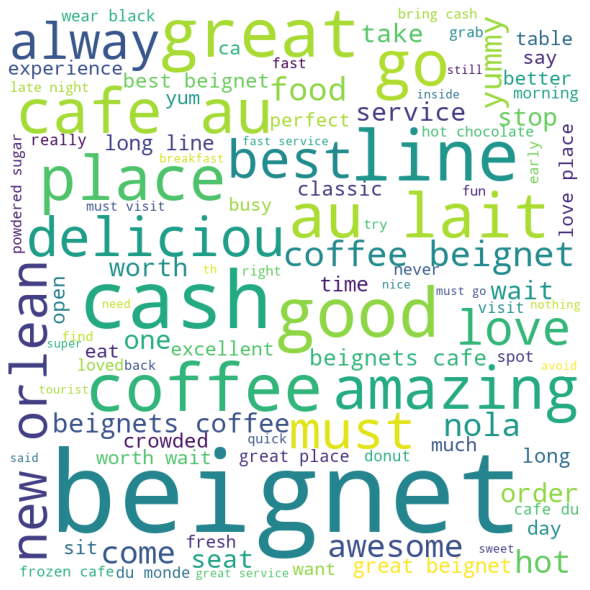

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud[0])
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

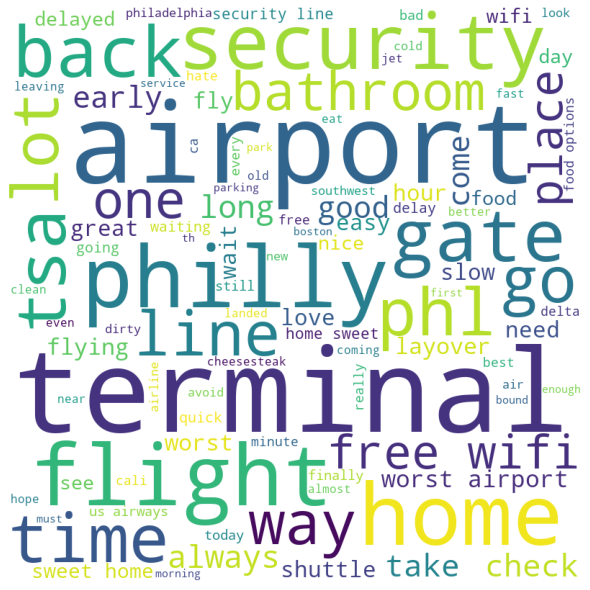

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud[1])
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

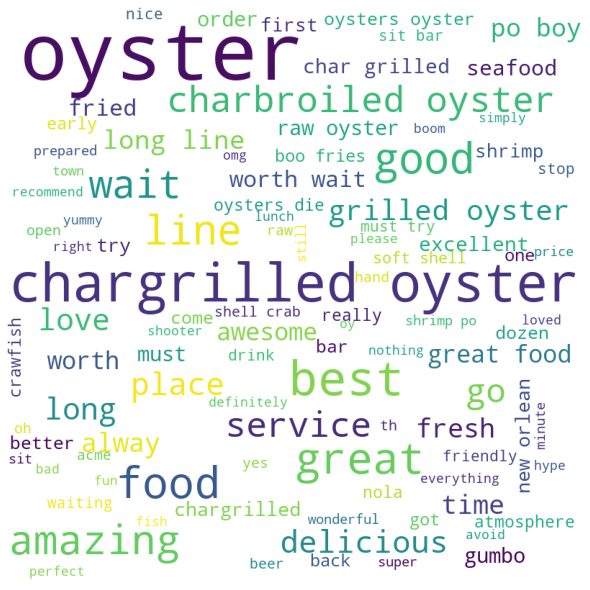

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud[2])
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

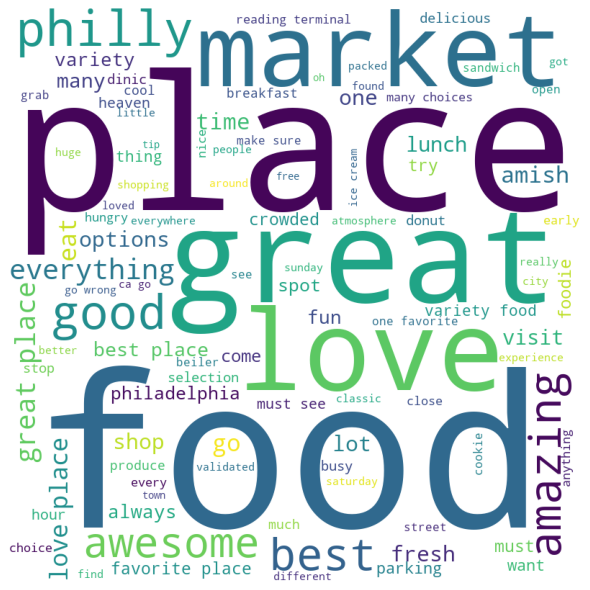

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud[3])
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

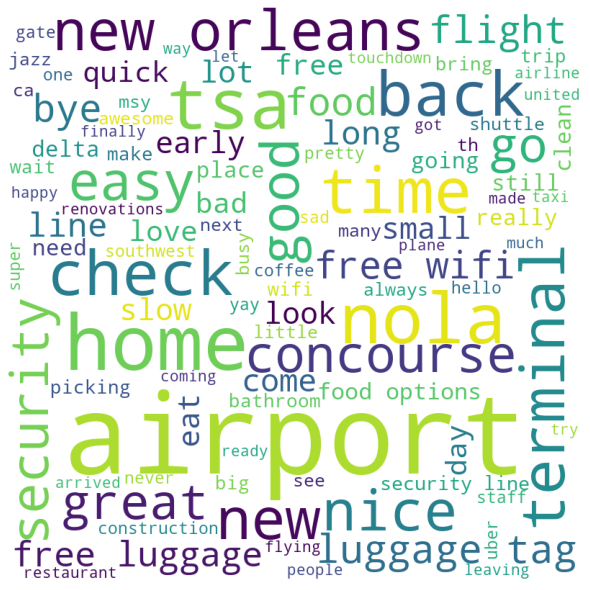

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud[4])
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()